### **Lessons From Two Landmark Australian Votes**

This notebook accompanies the Medium article “Democracy Down Under: Lessons From Two Landmark Australian Votes”. It performs a multivariate regression analysis to validate key findings from the visual (bivariate) Tableau analysis.

The dataset used in the analysis includes key demographic variables (such as age, education, migration background, and religiosity) alongside the percentage of Yes votes in the 2017 Marriage Equality postal survey and the 2023 Voice to Parliament referendum. Each data point corresponds to a Commonwealth Electorate Divisions (CED).

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

df.info()
# df.head()

Saving aus_votes_dataset.csv to aus_votes_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Division             152 non-null    object 
 1   DivisionID           152 non-null    object 
 2   Perc_65Older         152 non-null    float64
 3   Perc_BornOverseas    152 non-null    float64
 4   Perc_RecentMigrants  152 non-null    float64
 5   Perc_ATSI            152 non-null    float64
 6   Perc_CALD            152 non-null    float64
 7   Perc_EducYear12      152 non-null    float64
 8   Perc_EducHigher      152 non-null    float64
 9   Perc_Secular         152 non-null    float64
 10  Decile_SEIFA         152 non-null    float64
 11  ARIA                 152 non-null    float64
 12  Perc_YESMarriage     152 non-null    float64
 13  Perc_YESVoice        152 non-null    float64
dtypes: float64(12), object(2)
memory usa

Multivariate linear regression is used to model the percentage of Yes votes in two historic national ballots:

* The 2017 Marriage Equality Postal Survey
* The 2023 Indigenous Voice to Parliament Referendum

We examine how each of these outcomes relates to a range of demographic and structural factors, including:

* Age (% aged 65+)
* Migration background (born overseas, recent migrants)
* Education (high school, higher education completion)
* Religion/secular identity
* Cultural and linguistic diversity (CALD)
* Socio-economic advantage (Decile_SEIFA)
* Accessibility/remoteness (ARIA)

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Drop any rows with missing values
df = df.dropna()

# Define predictors including new variables
X = df[['Perc_65Older', 'Perc_BornOverseas', 'Perc_RecentMigrants'
        , 'Perc_ATSI', 'Perc_EducYear12'
        , 'Perc_CALD', 'Perc_EducHigher', 'Perc_Secular'
        , 'Decile_SEIFA', 'ARIA']]

# Define outcomes
y_marriage = df['Perc_YESMarriage']
y_voice = df['Perc_YESVoice']

# Marriage Equality Model
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y_marriage, test_size=0.25, random_state=42)
linear_model_m = LinearRegression()
linear_model_m.fit(X_train_m, y_train_m)
y_pred_m = linear_model_m.predict(X_test_m)

print("Marriage Equality - Linear Regression")
print("R-squared:", r2_score(y_test_m, y_pred_m))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))

coef_df_m = pd.Series(linear_model_m.coef_, index=X.columns)
print("\nMarriage Equality Coefficients:")
print(coef_df_m.sort_values(ascending=False))


# Voice Referendum Model
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y_voice, test_size=0.25, random_state=42)
linear_model_v = LinearRegression()
linear_model_v.fit(X_train_v, y_train_v)
y_pred_v = linear_model_v.predict(X_test_v)

print("\nVoice Referendum - Linear Regression")
print("R-squared:", r2_score(y_test_v, y_pred_v))
print("RMSE:", np.sqrt(mean_squared_error(y_test_v, y_pred_v)))

coef_df_v = pd.Series(linear_model_v.coef_, index=X.columns)
print("\nVoice Referendum Coefficients:")
print(coef_df_v.sort_values(ascending=False))


Marriage Equality - Linear Regression
R-squared: 0.8370235495404661
RMSE: 0.04539092980287344

Marriage Equality Coefficients:
Perc_RecentMigrants    0.646557
Perc_Secular           0.631397
Perc_EducHigher        0.569622
Perc_ATSI              0.127926
Perc_CALD              0.030683
Decile_SEIFA           0.002665
ARIA                  -0.044705
Perc_EducYear12       -0.112412
Perc_65Older          -0.434733
Perc_BornOverseas     -0.550480
dtype: float64

Voice Referendum - Linear Regression
R-squared: 0.7618376717595009
RMSE: 0.0581553363827181

Voice Referendum Coefficients:
Perc_CALD              0.948648
Perc_EducHigher        0.700722
Perc_Secular           0.651375
Perc_RecentMigrants    0.431894
Perc_ATSI              0.120179
Decile_SEIFA           0.019769
ARIA                  -0.053493
Perc_65Older          -0.088857
Perc_EducYear12       -0.183709
Perc_BornOverseas     -0.917468
dtype: float64


Results show that **higher education** and **secular worldviews** are consistent and strong predictors of Yes votes in both the Marriage Equality and Voice referendums. However, other variables behaved differently depending on the issue.

For the Marriage Equality vote, recent migrants were strongly supportive, while those born overseas and aged 65 and over were associated with lower Yes support.

In contrast, the Voice referendum showed the CALD population as the strongest positive predictor (more influential than education) while the foreign-born population again strongly correlated with No votes. Structural factors like SEIFA and ARIA had only minor effects in both models, suggesting that personal demographic characteristics had a more direct impact than broader community-level measures of advantage or remoteness.

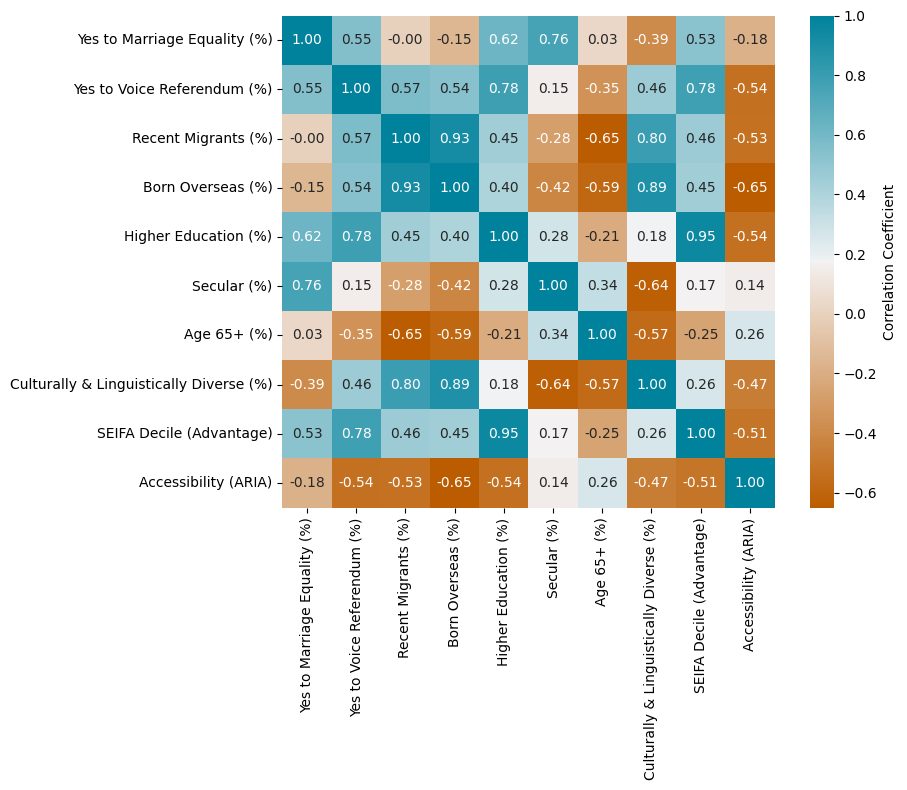

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

label_map = {
    'Perc_YESMarriage': 'Yes to Marriage Equality (%)',
    'Perc_YESVoice': 'Yes to Voice Referendum (%)',
    'Perc_RecentMigrants': 'Recent Migrants (%)',
    'Perc_BornOverseas': 'Born Overseas (%)',
    'Perc_EducHigher': 'Higher Education (%)',
    'Perc_Secular': 'Secular (%)',
    'Perc_65Older': 'Age 65+ (%)',
    'Perc_CALD': 'Culturally & Linguistically Diverse (%)',
    'Decile_SEIFA': 'SEIFA Decile (Advantage)',
    'ARIA': 'Accessibility (ARIA)'
}

focus_cols = list(label_map.keys())

corr = df.corr(numeric_only=True)
corr_focus = corr.loc[focus_cols, focus_cols]
corr_focus.rename(index=label_map, columns=label_map, inplace=True)

# amber-to-blue colourmap
amber_blue_cmap = sns.diverging_palette(30, 220, s=100, l=50, as_cmap=True)  # Amber to blue

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_focus,
    annot=True,
    cmap=amber_blue_cmap,
    fmt=".2f",
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.tight_layout()
plt.show()
